In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

Verify the dataset distribution

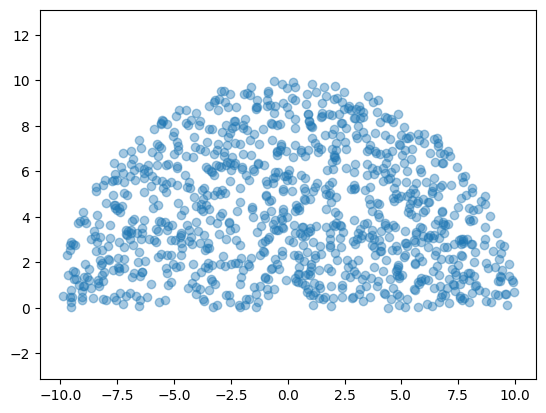

In [2]:
def range_angle_from_net_output(y_hat,r_lim):
    r = r_lim[0] + (y_hat[1] + 1)/2 * (r_lim[1] - r_lim[0])
    angle_rad = np.arcsin(y_hat[0])
    angle_deg = angle_rad * 180/np.pi
    return [r, angle_rad, angle_deg]

range_limits = [1,10]
n_pts = 1000
x_ = []
y_ = []
a = np.load('./dataset/polar_uniform_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/polar_uniform_positive_theta_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/polar_r_theta_uniform_100k.npy',allow_pickle=True).item()
# a = np.load('./dataset/25GHz_single_user_100k.npy',allow_pickle=True).item()
for i in range(n_pts):
    # r = np.random.uniform(range_limits[0], range_limits[1])
    theta, r = a[i]['y']
    r = range_limits[0] + (r + 1)/2 * (range_limits[1] - range_limits[0])
    # theta = np.random.uniform(-90,90)
    # theta = np.sin(np.deg2rad(theta))
    y_.append(r * np.sqrt(1 - theta**2))
    x_.append(r * theta)

plt.scatter(x_,y_,alpha=0.4)
# plt.xlim([-10, 10])
# plt.ylim([0, 10])
plt.axis('equal')
plt.show()

In [54]:
# df = pd.read_csv('saved_models/single_user/hyb_configs/sub-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/test_scores.csv') # 16 RF chains CNN - range uniform [1,10]
# df = pd.read_csv('saved_models/maximum_likelihood/25GHz_128N_1000trials/test_score.csv') # FULLY-DIGITAL (ML)
# df = pd.read_csv('saved_models/single_user/hyb_configs/fully-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq_dnn/test_scores.csv') # 16 RF chains DNN (x,y) uniform
# df = pd.read_csv('saved_models/single_user/hyb_configs/fully-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/test_scores.csv') # 16 RF chains DNN (x,y) uniform
# df = pd.read_csv('saved_models/single_user/N_RF/sub-connected_epochs50_batch256_lr0.001_64RF_128N_dropout01_eq1/test_scores.csv') # 64 RF chains CNN - (x,y) uniform POSITIVE THETA
# df = pd.read_csv('saved_models/single_user/N_RF/sub-connected_epochs50_batch256_lr0.001_16RF_128N_dropout01_eq/test_scores.csv') # 16 RF chains CNN - (x,y) uniform POSITIVE THETA
# df = pd.read_csv('saved_models/single_user_TIMES/hyb_configs/inter-connected_epochs80_batch256_lr0.001_16RF_256N_/test_scores.csv') # 16 RF chains CNN - (x,y) uniform POSITIVE THETA
df = pd.read_csv('saved_models/single_user_TIMES/multipath/sub-connected_epochs80_batch256_lr0.001_32RF_256N_/test_scores.csv') # 16 RF chains CNN - (x,y) uniform POSITIVE THETA

# df = pd.read_csv('saved_models/single_user/28GHz_30m/sub-connected_epochs50_batch256_lr0.001_16RF_256N_dropout01_eq_theta9090/test_scores.csv')
# df = pd.read_csv('saved_models/single_user/N256_r30/sub-connected_epochs50_batch256_lr0.001_16RF_256N_rmax30m/test_rmse1.csv')

Test set distribution (range)

Dataset description

In [57]:
# df = df[df['theta_true'] > 0]
df.describe()

,SNR,r_pred,r_true,theta_pred,theta_true,Test (r),Test (theta),Test (pos),Test (r_scat),Test (theta_scat),Test (pos_scat)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,10.000000,2.077068,2.008237,5.010821,-0.292036,5.089155e-01,1518.113337,1.950310,5.098431e-01,1706.267464,2.315304
std,7.071775,0.147694,0.705178,33.238063,51.716955,6.440972e-01,2156.298586,2.766145,5.796601e-01,2303.081338,2.426504
min,0.000000,1.438060,0.110473,-79.564453,-90.000000,5.282659e-07,0.000056,0.000042,1.557807e-08,0.000041,0.000339
25%,5.000000,1.979864,1.501233,-15.889671,-45.767966,7.614157e-02,127.825069,0.229982,8.126577e-02,175.907146,0.679109
50%,10.000000,2.075934,2.128431,5.495793,0.612035,2.907168e-01,643.097229,0.805700,3.226740e-01,813.621399,1.557991
75%,15.000000,2.174337,2.621045,27.355434,44.205091,6.682784e-01,2047.356750,2.458742,7.491378e-01,2361.742981,3.073863
max,20.000000,2.783227,2.999889,83.660393,90.000000,4.836154e+00,17933.949219,21.448881,3.755091e+00,23918.500000,21.890814


Score averaged for each SNR value

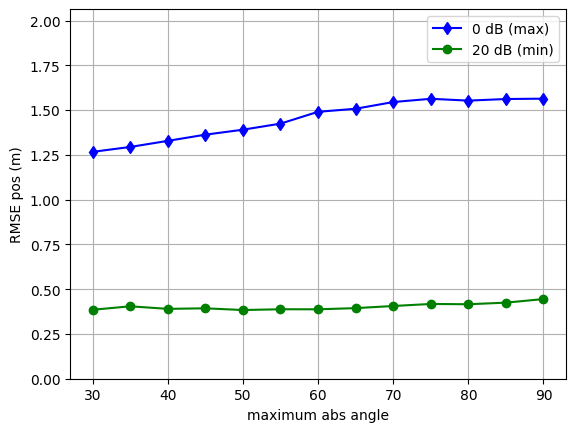

In [50]:
grouped_df_snr = df.groupby('SNR')
pos_min, pos_max = [], []
for i in range(13):
    r_list = []
    theta_list = []
    pos_list = []
    for snr, group in grouped_df_snr:
        angle_lim = 30 + 5*i
        group = group[np.abs(group['theta_true']) < angle_lim]
        # group = group[group['r_pred'] < 9.9]
        # group = group[np.abs(group['r_pred'] - group['r_true']) < 2]
        r_list.append(np.sqrt(group['Test (r)'].mean()))
        theta_list.append(np.sqrt(group['Test (theta)'].mean()))
        pos_list.append(np.sqrt(group['Test (pos)'].mean()))
    data = pd.DataFrame({
        'Test (r)': r_list,
        'Test (theta)': theta_list,
        'Test (pos)': pos_list,
    })
    # data.plot()
    pos_min.append(np.min(pos_list))
    pos_max.append(np.max(pos_list))
plt.plot([30 + 5*i for i in range(13)],pos_max,'d-b',label='0 dB (max)')
plt.plot([30 + 5*i for i in range(13)],pos_min,'o-g',label='20 dB (min)')
plt.legend()
plt.grid()
plt.ylim([0,max(pos_max)+0.5])
plt.xlabel('maximum abs angle')
plt.ylabel('RMSE pos (m)')
plt.show()

In [42]:
# df = pd.read_csv('saved_models/single_user/N_RF/sub-connected_epochs50_batch256_lr0.001_64RF_128N_dropout01_eq/test_scores.csv')
# filename = 'saved_models/single_user_TIMES/hyb_configs/fully-connected_epochs50_batch256_lr0.001_16RF_128N_dnn/'
# theta_max = 85
for theta_max in [85]:
    # for n_rf in [8,16,32,64]:
    for n_rf in [16,32]:
        # filename = f'saved_models/single_user_TIMES/N_RF/sub-connected_epochs80_batch256_lr0.001_{n_rf}RF_256N_/'
        filename = f'saved_models/single_user_TIMES/multipath/sub-connected_epochs80_batch256_lr0.001_{n_rf}RF_256N_/'
        df = pd.read_csv(f'{filename}test_scores.csv')
        grouped_df_snr = df.groupby('SNR')
        r_list = []
        theta_list = []
        pos_list = []
        for snr, group in grouped_df_snr:
            group = group[np.abs(group['theta_true']) < theta_max]
            # group = group[group['theta_true'] > 0]
            # group = group[group['r_pred'] < 9.9]
            # group = group[np.abs(group['r_pred'] - group['r_true']) < 2]
            r_list.append(np.sqrt(group['Test (r)'].mean()))
            theta_list.append(np.sqrt(group['Test (theta)'].mean()))
            pos_list.append(np.sqrt(group['Test (pos)'].mean()))
        data = pd.DataFrame({
            'Test (r)': r_list,
            'Test (theta)': theta_list,
            'Test (pos)': pos_list,
        })
        save_path = f'{filename}test_rmse{theta_max}.csv'
        data.to_csv(save_path,index=False)
data

,Test (r),Test (theta),Test (pos)
0,0.728280,44.436948,1.539628
1,0.704531,37.516033,1.383904
2,0.718396,34.707307,1.260621
3,0.724605,35.679471,1.264404
4,0.697008,35.480062,1.304686


Single User

In [564]:
theta_max = 80

for i in [8, 16, 32, 64]:
    df = pd.read_csv(f'saved_models/single_user/N_RF/sub-connected_epochs50_batch256_lr0.001_{i}RF_128N_dropout01_eq/test_scores.csv')
    grouped_df_snr = df.groupby('SNR')
    r_list = []
    theta_list = []
    pos_list = []
    for snr, group in grouped_df_snr:
        group = group[np.abs(group['theta_true']) < theta_max]
        # group = group[group['theta_true'] > 0]
        # group = group[group['r_pred'] < 9.9]
        # group = group[np.abs(group['r_pred'] - group['r_true']) < 2]
        r_list.append(np.sqrt(group['Test (r)'].mean()))
        theta_list.append(np.sqrt(group['Test (theta)'].mean()))
        pos_list.append(np.sqrt(group['Test (pos)'].mean()))
    data = pd.DataFrame({
        'Test (r)': r_list,
        'Test (theta)': theta_list,
        'Test (pos)': pos_list,
    })
    save_path = f'saved_models/single_user/N_RF/sub-connected_epochs50_batch256_lr0.001_{i}RF_128N_dropout01_eq/test_rmse{theta_max}.csv'
    data.to_csv(save_path,index=False)
    data

Multipath Case

In [577]:
theta_max = 90

# for i in [8, 16, 32]:
for i in [16]:
    df = pd.read_csv(f'saved_models/single_user/multipath/sub-connected_epochs50_batch256_lr0.001_{i}RF_128N_scat_CN/test_scores.csv')
    grouped_df_snr = df.groupby('SNR')
    r_list = []
    theta_list = []
    pos_list = []
    r_scat_list = []
    theta_scat_list = []
    pos_scat_list = []
    for snr, group in grouped_df_snr:
        group = group[np.abs(group['theta_true']) < theta_max]
        r_list.append(np.sqrt(group['Test (r)'].mean()))
        theta_list.append(np.sqrt(group['Test (theta)'].mean()))
        pos_list.append(np.sqrt(group['Test (pos)'].mean()))
        r_scat_list.append(np.sqrt(group['Test (r_scat)'].mean()))
        theta_scat_list.append(np.sqrt(group['Test (theta_scat)'].mean()))
        pos_scat_list.append(np.sqrt(group['Test (pos_scat)'].mean()))
    data = pd.DataFrame({
        'Test (r)': r_list,
        'Test (theta)': theta_list,
        'Test (pos)': pos_list,
        'Test (r_scat)': r_scat_list,
        'Test (theta_scat)': theta_scat_list,
        'Test (pos_scat)': pos_scat_list,
    })
    save_path = f'saved_models/single_user/multipath/sub-connected_epochs50_batch256_lr0.001_{i}RF_128N_scat_CN/test_rmse{theta_max}.csv'
    # data.to_csv(save_path,index=False)
    print(data)

   Test (r)  Test (theta)  Test (pos)  Test (r_scat)  Test (theta_scat)  \
0  2.470079     37.173445    4.342508       2.475252          37.476148   
1  2.198866     25.689500    3.116145       2.176989          25.526457   
2  2.007376     17.552299    2.397797       1.996516          17.528377   
3  1.923336     14.364919    2.185536       1.885268          14.646008   
4  1.911105     14.960556    2.135959       1.905335          14.888669   

   Test (pos_scat)  
0         4.568356  
1         3.392933  
2         2.720588  
3         2.485673  
4         2.478995  


,SNR,Test (theta),Test (theta_scat),Test (r),Test (r_scat),Test (pos),Test (pos_scat)
0,0,0.016911,5.679482,1.527280,1.896234,1.853403,2.154560
1,5,9.559242,6.878021,2.506140,5.888693,5.372949,6.457626
2,10,4.194946,0.590542,1.833545,2.983922,2.847491,2.986915
3,15,1.596633,2.030327,2.328837,4.961535,0.547386,4.978136
4,20,2.843906,3.161356,1.235887,1.207141,0.036700,1.459692
5,0,6.249519,4.108879,0.229562,0.074255,0.784348,0.362542
6,5,7.928153,2.830395,0.999500,3.702447,0.957837,3.770945
7,10,1.242906,1.860591,2.252814,5.483226,0.493413,5.530288
8,15,3.689747,3.255611,0.780206,2.470826,0.166063,2.580917
9,20,4.625534,1.555038,4.330458,22.199657,18.161654,22.212135


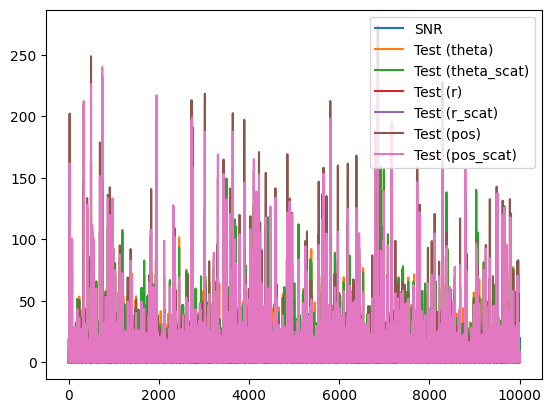

In [600]:
df = pd.read_csv(f'saved_models/single_user/multipath/sub-connected_epochs50_batch256_lr0.001_32RF_128N_scat_CN/test_scores.csv')
# df = df[df['SNR'] == 15]
df['Test (theta)'] = np.sqrt(df['Test (theta)'])
df['Test (theta_scat)'] = np.sqrt(df['Test (theta_scat)'])
df['Test (r)'] = np.sqrt(df['Test (r)'])
df[['SNR','Test (theta)','Test (theta_scat)','Test (r)', 'Test (r_scat)','Test (pos)','Test (pos_scat)']].plot()
df[['SNR','Test (theta)','Test (theta_scat)','Test (r)', 'Test (r_scat)','Test (pos)','Test (pos_scat)']].head(15)

Regression plot for range and angle values. SNR = $[0,5,10,15,20]$ dB

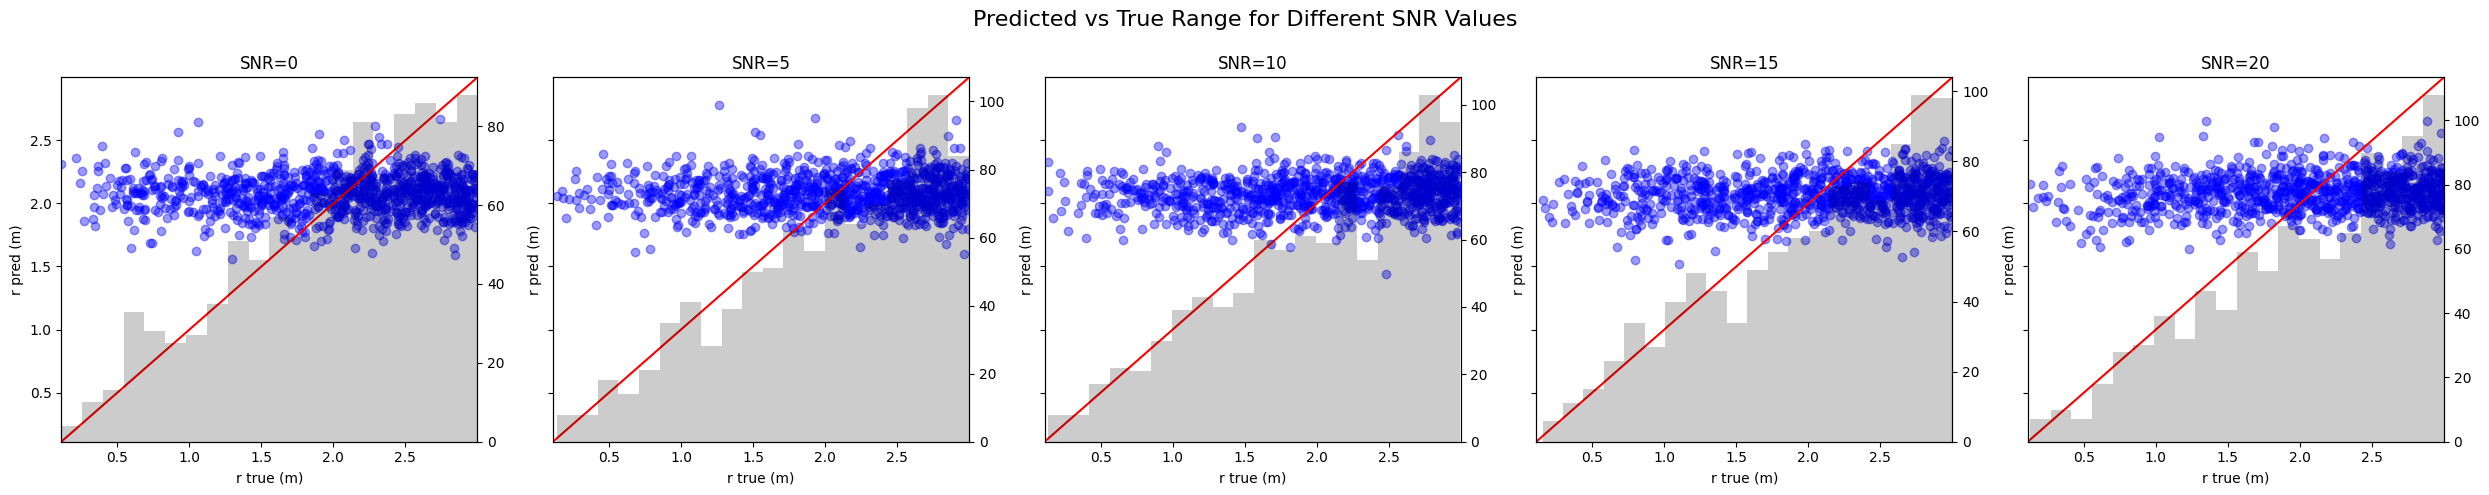

In [55]:
snr_values = [0, 5, 10, 15, 20]
r_lim = [df['r_true'].min(),df['r_true'].max()]
fig, axs = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)

for i, snr in enumerate(snr_values):
    df1 = df[df['SNR'] == snr]
    # df1 = df1[np.abs(df1['theta_true']) < 85]
    # df1 = df1[df1['r_pred'] < 9.9]
    # df1 = df1[np.abs(df1['r_pred'] - df1['r_true']) < 2]
    ax1 = axs[i]
    # if i == 0:
    #     ax1.plot(np.random.uniform(low=1, high=10, size=2000), df1['r_true'], 'x', color='r', alpha=0.4)
    ax1.plot(df1['r_true'],df1['r_pred'], 'o', color='b', alpha=0.4)
    ax1.plot(np.linspace(r_lim[0], r_lim[1], 100), np.linspace(r_lim[0], r_lim[1], 100), '-r', linewidth=1.5)
    # ax1.plot(df1['r_pred'], np.sqrt(df1['Test (pos)']), 'o', color='b', alpha=0.4)
    ax1.set_title(f'SNR={snr}')
    ax1.set_ylabel('r pred (m)')
    ax1.set_xlabel('r true (m)')
    ax1.set_xlim(r_lim)
    ax1.set_ylim(r_lim)
    ax2 = ax1.twinx()
    ax2.hist(df1['r_true'], bins=20, color='k', alpha=0.2)

plt.suptitle('Predicted vs True Range for Different SNR Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


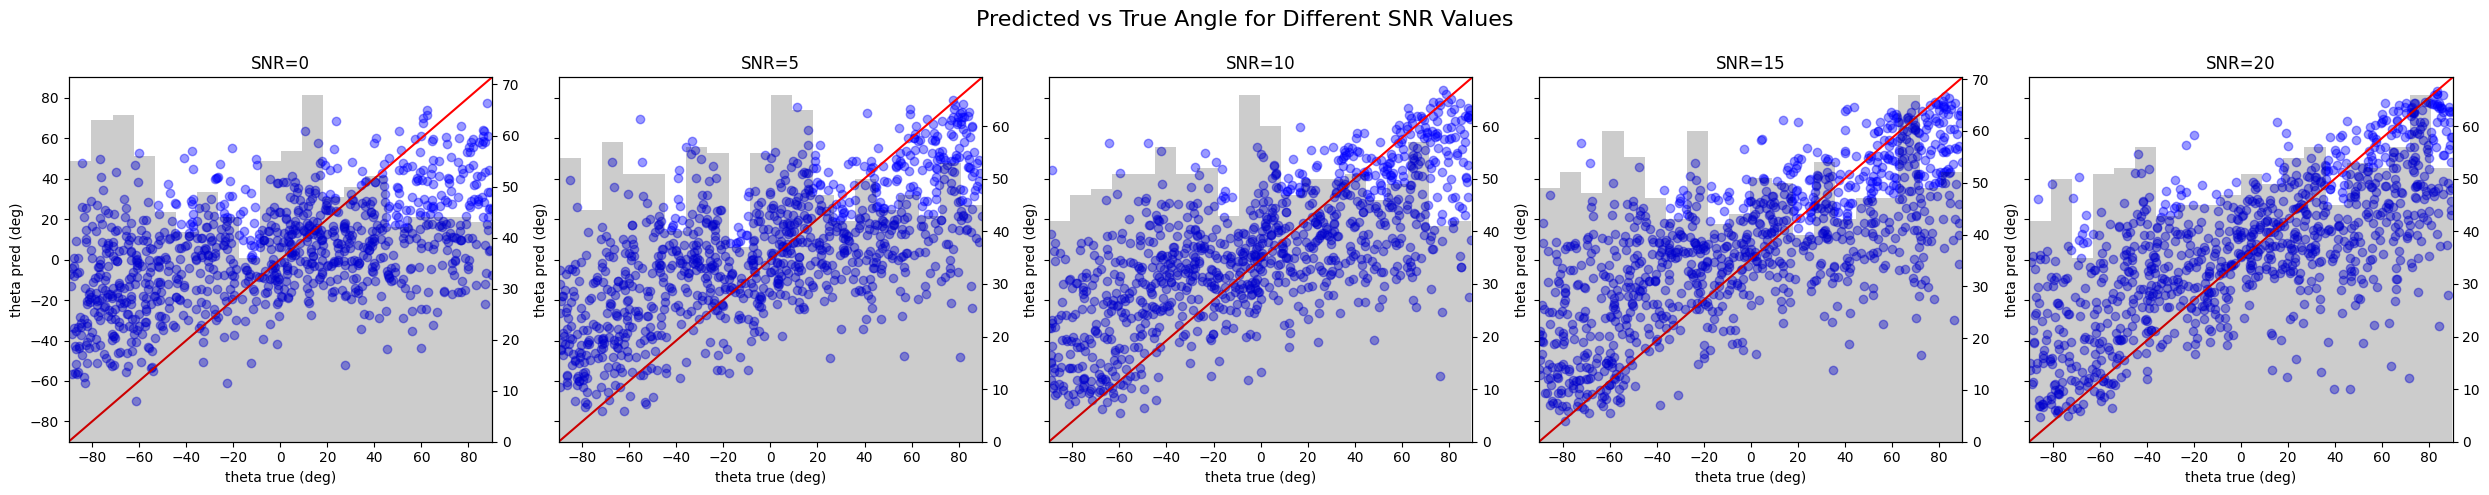

In [56]:
snr_values = [0, 5, 10, 15, 20]
fig, axs = plt.subplots(1, 5, figsize=(25, 5), sharex=True, sharey=True)

for i, snr in enumerate(snr_values):
    df1 = df[df['SNR'] == snr]
    # df1 = df1[np.abs(df1['theta_true']) < 70]
    ax1 = axs[i]
    ax1.plot(df1['theta_true'],df1['theta_pred'], 'o', color='b', alpha=0.4)
    ax1.plot(np.linspace(-90, 90, 100), np.linspace(-90, 90, 100), '-r', linewidth=1.5)
    ax1.set_title(f'SNR={snr}')
    ax1.set_ylabel('theta pred (deg)')
    ax1.set_xlabel('theta true (deg)')
    ax1.set_xlim([-90, 90])
    ax1.set_ylim([-90, 90])
    ax2 = ax1.twinx()
    ax2.hist(df1['theta_true'], bins=20, color='k', alpha=0.2)

plt.suptitle('Predicted vs True Angle for Different SNR Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


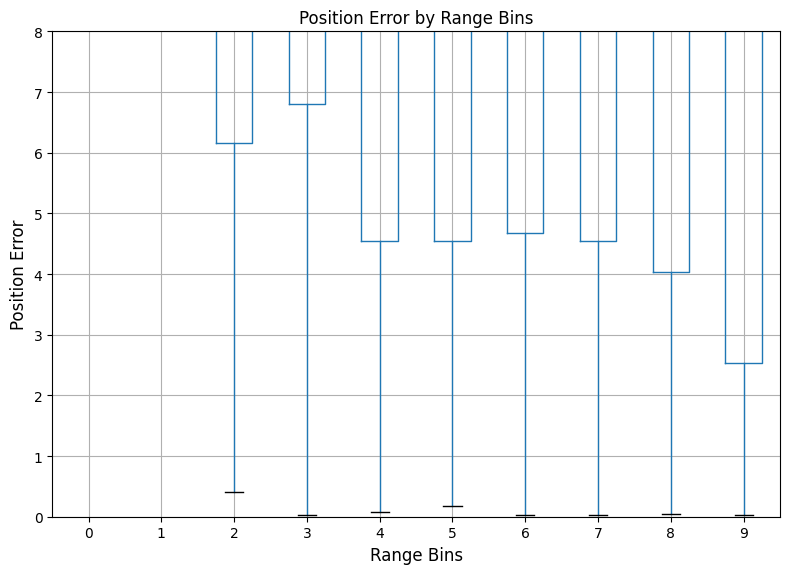

In [500]:
df_positive_theta = df[df['theta_true'] > 0]
df1 = df_positive_theta[df_positive_theta['SNR'] == 0]
df1 = df1.sort_values('r_pred')

# Create bins for r_pred and assign each r_pred value to a bin
bins = np.linspace(df1['r_pred'].min(), df1['r_pred'].max(), 10)  # 10 edges, 9 bins
df1['r_bin'] = np.digitize(df1['r_pred'], bins, right=True)  # Ensure all values are within range

# Create a box plot for 'Test (pos)' grouped by range bins
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting boxplot where r_bin is on the x-axis and position error is on the y-axis
df1.boxplot(column='Test (pos)', by='r_bin', ax=ax, grid=True)

# Customize the plot
ax.set_xlabel('Range Bins', fontsize=12)
ax.set_ylabel('Position Error', fontsize=12)
ax.set_title('Position Error by Range Bins')
plt.suptitle('')  # Remove the default "Boxplot grouped by..." title

# Adjust the ticks to match the number of bins (9 bins, not 10)
bin_centers = (bins[:-1] + bins[1:]) / 2  # There are only 9 bin centers for 10 edges
# ax.set_xticklabels([f'{round(b, 2)}' for b in range(1,11)], rotation=45)

# Add grid, set axis limits, and show the plot
ax.grid(True)
ax.set_ylim([0, 8])  # Adjust Y limits if needed
plt.tight_layout()
plt.show()
